In [2]:
%load_ext autoreload
%autoreload 2
%cd C:\MAD4AG
%matplotlib inline

C:\MAD4AG


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
df_survey = pd.read_pickle(f'./dbs/survey_act_weekday.pkl')

In [4]:
def cluster_tempo(pur=None, survey=None, interval=60, norm=True):
    """
    :param interval: resolution of temporal counting in minute, e.g., 30 min
    :type interval: int
    :param pur: Purpose to add to the activity
    :type pur: str
    :param survey: Input data from the survey
    :type survey: dataframe
    :return: A dataframe of half-hour frequency of a certain activity.

    """
    holder_size = int( 24 * (60 / interval))
    holder = np.zeros((holder_size, 1))

    temps=list(survey.loc[survey['purpose'] == pur, ['h_s', 'dur']].to_records(index=False))
    #number_ppl= len(survey[survey.purpose==pur].sub_id.unique())
    number_ppl= len(survey.sub_id.unique())

    for tm in temps:
        start_ = int(np.floor(tm[0] / interval))
        end_ = int(np.floor((tm[0]+ int(tm[1])) / interval))
        holder[start_:end_ + 1, 0] += 1

    #print(holder)

    holder_day = holder
    df = pd.DataFrame()
    df.loc[:, 'time'] = range(0, len(holder_day))
    df.loc[:, 'freq'] = holder_day
    if norm:
        df['freq'][df['freq']>number_ppl]= number_ppl
        df.loc[:, 'freq'] /= number_ppl
    if pur is not None:
        df.loc[:, 'activity'] = pur
    return df

In [5]:
df_act = df_survey.copy()
#df_act = pd.read_csv('Master Thesis/Master Thesis Colab/DataFolder/Cag_survey_final_new.csv')

df_act['urban_density'] =df_act['act_deso'].str[4]

In [6]:
home_all = cluster_tempo( survey=df_act, pur='Home', interval=60, norm=True )
#home_all = home_all.pivot(index='activity', columns='time', values='freq')

C:\Users\aglar\AppData\Local\anaconda3\envs\pycharm\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## by urban density

In [7]:
home_A_ppl = df_act[(df_act.urban_density == 'A') & (df_act.purpose == 'Home')].sub_id.unique()
home_A_ppl = df_act[df_act.sub_id.isin(home_A_ppl)]
home_A = cluster_tempo(survey=home_A_ppl, pur='Home', interval=60, norm=True)
home_A['activity'] = 'A'

home_B_ppl = df_act[(df_act.urban_density == 'B') & (df_act.purpose == 'Home')].sub_id.unique()
home_B_ppl = df_act[df_act.sub_id.isin(home_B_ppl)]
home_B = cluster_tempo(survey=home_B_ppl, pur='Home', interval=60, norm=True)
home_B['activity'] = 'B'

home_C_ppl = df_act[(df_act.urban_density == 'C') & (df_act.purpose == 'Home')].sub_id.unique()
home_C_ppl = df_act[df_act.sub_id.isin(home_C_ppl)]
home_C = cluster_tempo(survey=home_C_ppl, pur='Home', interval=60, norm=True)
home_C['activity'] = 'C'

C:\Users\aglar\AppData\Local\anaconda3\envs\pycharm\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
df_survey_tempo = [home_all, home_A,home_B,home_C]

df_survey_tempo = pd.concat(df_survey_tempo)

df_survey_tempo = df_survey_tempo.pivot(index='activity', columns='time', values='freq')

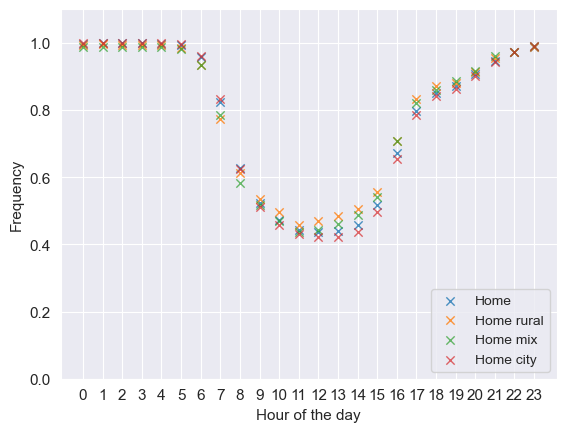

In [9]:
plt.scatter(range(0,24), df_survey_tempo.loc['Home', :].values.tolist(), label='Home', marker='x', alpha=0.8,linewidths=1)
plt.scatter(range(0,24), df_survey_tempo.loc['A', :].values.tolist(), label='Home rural', marker='x', alpha=0.8,linewidths=1)
plt.scatter(range(0,24), df_survey_tempo.loc['B', :].values.tolist(), label='Home mix', marker='x', alpha=0.7,linewidths=1)
plt.scatter(range(0,24), df_survey_tempo.loc['C', :].values.tolist(), label='Home city', marker='x', alpha=0.7,linewidths=1)
plt.xlabel('Hour of the day', fontsize=11)
plt.ylabel('Frequency', fontsize=11)

x_labels = range(0, 24)  # Generate labels from 1 to 24
x_ticks = range(0, 24, 1)  # Position the labels every other data point
plt.ylim(0, 1.1)
plt.xticks(x_ticks, x_labels, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=10, frameon=True, loc='lower right')
plt.savefig('figures/temporal_visitation_pattern_home.png', dpi=300, bbox_inches="tight")


plt.show()

## performs the two-sample Kolmogorov-Smirnov (KS) test

In [10]:
from scipy.stats import ks_2samp

for sample in ['A', 'B','C']:
    # Generate two sample datasets (replace these with your actual data)
    sample1 = df_survey_tempo.loc['Home', :].values.tolist()
    sample2 = df_survey_tempo.loc[sample, :].values.tolist()

    # Perform the KS test
    statistic, p_value = ks_2samp(sample1, sample2)

    # Print the results
    print(sample+ " KS Statistic:", statistic)
    print(sample+ " P-value:", p_value)

    # Compare p-value to the chosen significance level (e.g., 0.05)
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: The samples do not come from the same distribution.")
    else:
        print("Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.")

A KS Statistic: 0.20833333333333334
A P-value: 0.686017125117228
Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.
B KS Statistic: 0.25
B P-value: 0.4490368220409109
Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.
C KS Statistic: 0.20833333333333334
C P-value: 0.686017125117228
Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.


In [11]:
# Generate two sample datasets (replace these with your actual data)
sample1 = df_survey_tempo.loc['A', :].values.tolist()
sample2 = df_survey_tempo.loc['C', :].values.tolist()

# Perform the KS test
statistic, p_value = ks_2samp(sample1, sample2)

# Print the results
print(" KS Statistic:", statistic)
print(" P-value:", p_value)

# Compare p-value to the chosen significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The samples do not come from the same distribution.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.")

 KS Statistic: 0.25
 P-value: 0.4490368220409109
Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.


## by counties

In [12]:
county_list = df_act[df_act.purpose=='Home'].home_county.unique()

home_county_list = []
for county in county_list:
    home_county = cluster_tempo( survey=df_act[df_act.home_county==county], pur='Home', interval=60, norm=True )
    home_county_list.append(home_county)

    home_county['activity'] = county



#home_A = cluster_tempo( survey=df_act[df_act.urban_density=='A'], pur='Home', interval=60, norm=True )


C:\Users\aglar\AppData\Local\anaconda3\envs\pycharm\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
df_survey_county = pd.concat(home_county_list)

df_survey_county = df_survey_county.pivot(index='activity', columns='time', values='freq')

In [14]:
for sample in county_list:
    # Generate two sample datasets (replace these with your actual data)
    sample1 = df_survey_tempo.loc['Home', :].values.tolist()
    sample2 = df_survey_county.loc[sample, :].values.tolist()

    # Perform the KS test
    statistic, p_value = ks_2samp(sample1, sample2)



    # Compare p-value to the chosen significance level (e.g., 0.05)
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: The samples do not come from the same distribution.")
        print(str(sample)+ " KS Statistic:", statistic)
        print(str(sample)+ " P-value:", p_value)
    else:
        print("Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.")


Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.
Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.
Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.
Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.
Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.
Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.
Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.
Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.
Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.
Fail to reject the null hypothesis: There is not enough evidence to conclude diffe

# work

In [15]:
work_all = cluster_tempo( survey=df_act, pur='Work', interval=60, norm=True )
work_all = work_all.pivot(index='activity', columns='time', values='freq')

school_all = cluster_tempo( survey=df_act, pur='School', interval=60, norm=True )
school_all = school_all.pivot(index='activity', columns='time', values='freq')

other_all = cluster_tempo( survey=df_act, pur='Other', interval=60, norm=True )
other_all = other_all.pivot(index='activity', columns='time', values='freq')

df_survey_tempo = pd.concat([df_survey_tempo, work_all, school_all, other_all ], axis=0)

C:\Users\aglar\AppData\Local\anaconda3\envs\pycharm\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [16]:
df_survey_tempo.to_csv(f'./dbs/intermediate/act_temporal_pattern.csv')


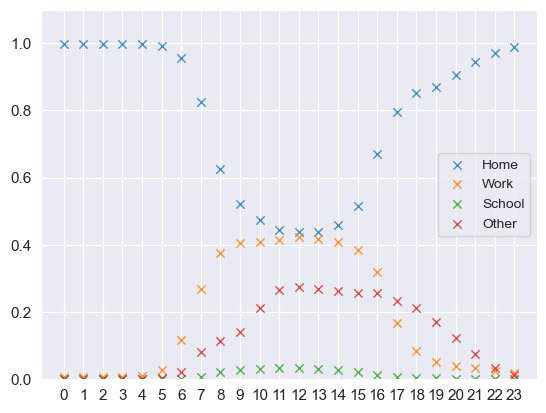

In [17]:
plt.scatter(range(0,24), df_survey_tempo.loc['Home', :].values.tolist(), label='Home', marker='x', alpha=0.8,linewidths=1)

plt.scatter(range(0,24), df_survey_tempo.loc['Work', :].values.tolist(), label='Work', marker='x', alpha=0.8,linewidths=1)

plt.scatter(range(0,24), df_survey_tempo.loc['School', :].values.tolist(), label='School', marker='x', alpha=0.8,linewidths=1)

plt.scatter(range(0,24), df_survey_tempo.loc['Other', :].values.tolist(), label='Other', marker='x', alpha=0.8,linewidths=1)

x_labels = range(0, 24)  # Generate labels from 1 to 24
x_ticks = range(0, 24, 1)  # Position the labels every other data point
plt.ylim(0, 1.1)
plt.xticks(x_ticks, x_labels, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=10, frameon=True, loc='center right')
plt.savefig('figures/temporal_visitation_pattern_all.png', dpi=300, bbox_inches="tight")


plt.show()

## work/school together

In [18]:
df_act['purpose'][df_act['purpose']=='Work'] = "Work/School"
df_act['purpose'][df_act['purpose']=='School'] = "Work/School"

C:\Users\aglar\AppData\Local\anaconda3\envs\pycharm\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\aglar\AppData\Local\anaconda3\envs\pycharm\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
work_school = cluster_tempo( survey=df_act, pur='Work/School', interval=60, norm=True )
work_school = work_school.pivot(index='activity', columns='time', values='freq')

C:\Users\aglar\AppData\Local\anaconda3\envs\pycharm\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
df_survey_tempo = pd.concat([df_survey_tempo, work_school], axis=0)


In [21]:
df_survey_tempo.to_csv(f'./dbs/intermediate/act_temporal_pattern.csv')


## plotting weights

In [25]:
plt.style.use('seaborn-white')


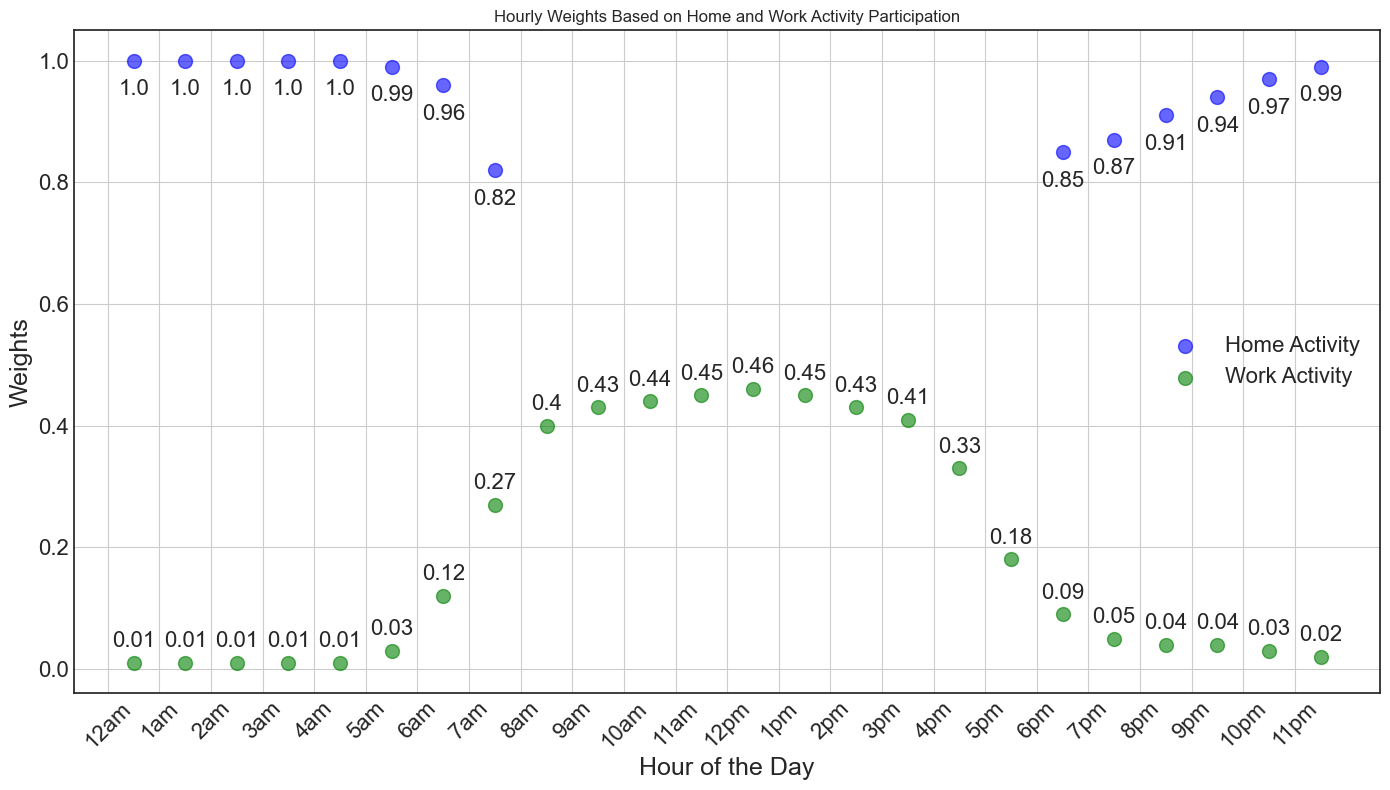

In [45]:
import matplotlib.pyplot as plt

# Hours mapped to a continuous scale (0-23 for 24 hours)
hour_map = {h: i for i, h in enumerate(['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am',
                                        '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm',
                                        '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm'])}

# Adjusted hours for the mapping to place dots between ticks
hours_home = ['6pm', '7pm', '8pm', '9pm', '10pm', '11pm', '12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am']
weights_home = [0.85, 0.87, 0.91, 0.94, 0.97, 0.99, 1.00, 1.00, 1.00, 1.00, 1.00, 0.99, 0.96, 0.82]
# Adding 0.5 to shift the points to the middle of the interval
hours_home_mapped = [hour_map[hr] + 0.5 for hr in hours_home]

weights_work = [0.01, 0.01, 0.01, 0.01, 0.01, 0.03, 0.12, 0.27, 0.40, 0.43, 0.44, 0.45, 0.46, 0.45, 0.43, 0.41, 0.33, 0.18, 0.09, 0.05, 0.04, 0.04, 0.03, 0.02]
hours_work_mapped = [i + 0.5 for i in range(24)]  # Shifting by 0.5

# Combining home and work into one scatter plot
plt.figure(figsize=(14, 8))
plt.scatter(hours_home_mapped, weights_home, color='blue', label='Home Activity', s=100, alpha=0.6)
plt.scatter(hours_work_mapped, weights_work, color='green', label='Work Activity', s=100, alpha=0.6)

# Annotate each point with the weight value
for i, txt in enumerate(weights_home):
    plt.annotate(txt, (hours_home_mapped[i], weights_home[i]-0.08), textcoords="offset points", xytext=(0,10), ha='center', fontsize=16)
for i, txt in enumerate(weights_work):
    plt.annotate(txt, (hours_work_mapped[i], weights_work[i]+0.06), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=16)

plt.title('Hourly Weights Based on Home and Work Activity Participation')
plt.xlabel('Hour of the Day', fontsize=18)
plt.ylabel('Weights', fontsize=18)
# Adjusting x,y-ticks to align with the new point positions
plt.yticks( fontsize=16)

plt.xticks([i for i in range(24)], list(hour_map.keys()), rotation=45, fontsize=16)
plt.legend(prop={'size': 16})
plt.grid(True)
plt.tight_layout()


plt.savefig('figures/primary_activities_weights.jpg', dpi=300, bbox_inches="tight")


plt.show()
